**Music Recommendation System - Sean McLean**

**Final Submission - Music Recommendation Systems**

**Executive Summary**

*   What are the key takeaways?
*   What are the key next steps?

**Problem and Solution Summary**

*   What problem was being solved?
*   What are the key points that describe the final proposed solution design?
*   Why is this a 'valid' solution that is likely to solve the problem?

**Recommendations for Implementation**

*   What are some key recommendations to implement the solutions?
*   What are the key actionables for stakeholders?
*   What is the expected benefit and/or costs? What are the key risks and challenges?
*   What further analysis needs to be done or what other associated problems need to be solved?

**Milestone 1**


**Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

Data Source

http://millionsongdataset.com/

**Important Notes**

*   This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise.
*   In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.
*   The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.
*   All the outputs in the notebook are just for reference and can be different if you follow a different approach.
*   There are sections called Think About It in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

**Importing Libraries and the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from collections import defaultdict

from sklearn.metrics import mean_squared_error

**Load the dataset**

In [ ]:
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

**Understanding the data by viewing a few observations**

In [ ]:
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


**Let us check the data types and and missing values of each column**

In [ ]:
count_df['user_id'].nunique()

76353

In [ ]:
song_df['song_id'].nunique()

999056

In [ ]:
count_df['song_id'].nunique()

10000

In [ ]:
count_df['play_count'].nunique()

295

In [ ]:
song_df['release'].nunique()

149288

In [ ]:
song_df['year'].nunique()

90

In [ ]:
song_df['artist_name'].nunique()

72665

In [ ]:
song_df.describe()

,year
count,1000000.000000
mean,1030.325652
std,998.745002
min,0.000000
25%,0.000000
50%,1969.000000
75%,2002.000000
max,2011.000000


In [ ]:
count_df.describe()

,Unnamed: 0,play_count
count,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.045485e+00
std,5.773504e+05,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,4.999998e+05,1.000000e+00
50%,9.999995e+05,1.000000e+00
75%,1.499999e+06,3.000000e+00
max,1.999999e+06,2.213000e+03


In [ ]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [ ]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

**Observations and Insights:**

*   Overall there are 1,000,000 songs in the file and 2,000,000 interactions in the count file. In the song file there are a total 20 of missing values with 15 coming from the song titles column and the other 5 that derive from the album release column. Most of the data types in the two files are objective with the other few being integer data types, including how many times a song was played.
*   One thing I noticed is that from the first 10 records in the song file is that there are several 0's under the year column, even though they are zero missing values when looking at the data types. This could possibly impact the users recommendations if the time period is a key aspect of what a user listens to. For example, if a user listens to a lot of music from the 1970's, the best recommendations from that era may not be provided to the user because that information is missing.
*   From the count file there doesn't seem to be anything that stands out like missing values.


In [ ]:
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


In [ ]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
df['song_id'].nunique()

10000

In [ ]:
df['user_id'].nunique()

76353

In [ ]:
df['artist_name'].nunique()

3375


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

*   Encrypting the user_id and song_id columns in the files I believe can be encoded to numeric features and would be easier to visualize. Their original objective data type has each entry as being a large group of numbers and letters, so encoding them to just being a numeric feature will be easier to understand for future visualization and programming.

In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas.core.arrays.interval import le
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

le = LabelEncoder()

df['user_id'] = le.fit_transform(df['user_id'])

df['song_id'] = le.fit_transform(df['song_id'])

In [ ]:
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

*   I think collectively it makes sense to include both types of users in terms of how many songs they have listened to. Regardless of how many listens a user has I think there is enough information there to include both types of users where a reliable recommendation system can be built. I think even if a user has only listened to a small amount of songs that there could still be some commonalities between the listened songs where a recommendation system can be built and wouldn't be too much different from a user who has listened to a lot of songs. Despite this, more listens would create a better recommendation system with the amount of data to use.

In [ ]:
users = df.user_id

ratings_count = dict()

for user in users:
    
    if user in ratings_count:
        ratings_count[user] += 1
    
    else:
        ratings_count[user] = 1

In [ ]:
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
songs = df.song_id

ratings_count = dict()

for song in songs:
    
    if song in ratings_count:
        ratings_count[song] += 1
    
    else:
        ratings_count[song] = 1 

In [ ]:
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final = df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
df_final=df_final[df_final.play_count<=5]

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


In [ ]:
df_final.shape

(117876, 7)

In [ ]:
df_final.size

825132

In [ ]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


**Exploratory Data Analysis**

**Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
print('Number of unique USERS in Raw data = ', df_final['user_id'].nunique())

Number of unique USERS in Raw data =  3155


Total number of unique song id

In [ ]:
print('Number of unique SONGS in Raw data = ', df_final['song_id'].nunique())

Number of unique SONGS in Raw data =  563


Total number of unique artists

In [ ]:
print('Number of unique ARTISTS in Raw data = ', df_final['artist_name'].nunique())

Number of unique ARTISTS in Raw data =  232


**Observations and Insights:**

*   There is a decent amount of unique users that have listened to at least 90 songs in the dataset but after the reduction of users from the minimum requirement of songs listened to I am surprised it is still kind of high. My guess is that many users just listen to music casually without repeating songs or the recommendation system in place from past interactions isn't entirely suited to their music interests.
*   There is a much smaller number of unique songs in the revised dataset which indicates that they are getting a lot of users listening to them. Maybe these are attractive songs for the recommendation system to suggest in terms of past interactions but not popular songs in the mainstream where they will receive more than one listen on a streaming service.
*   The total number of unique artists is even smaller than the unique songs so based off the revised dataset maybe these are lesser known artists in terms of popularity or its possible they don't have much music available in the dataset. Maybe they also did not receive enough listens of their music so they did not show up in the condensed dataset.

**Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
most_rated = df_final.groupby('song_id').size().sort_values(ascending = False)[:10]
most_rated

song_id
8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
dtype: int64

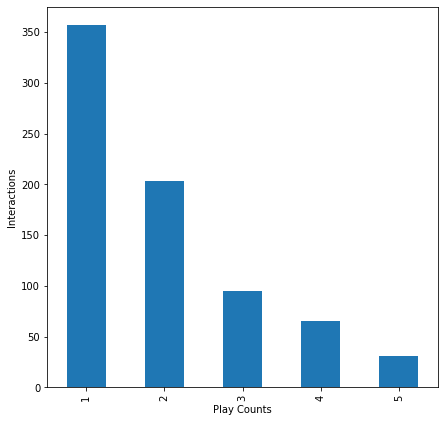

In [ ]:
# Plotting distributions of play counts for 751 interactions with song_id 8582

plt.figure(figsize = (7, 7))

df_final[df_final['song_id'] == 8582]['play_count'].value_counts().plot(kind = 'bar')

plt.xlabel('Play Counts')

plt.ylabel('Interactions')

plt.show()

*   Plotting the song with the most ratings (song_id 8582 with 751 interactions) shows an interesting breakdown as to how many times the song was listened to with the cap of 5 interactions maximum. Almost half of the interactions had just one listen and decreased with every possible interaction. So overall, despite the song being the most interacted with, it is not a song that streamers will likely go back and listen to multiple times.

Most interacted users

In [ ]:
most_rated = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
most_rated

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
dtype: int64

Interacted songs by year

In [ ]:
most_rated = df_final.groupby('year').size().sort_values(ascending = False)[:10]
most_rated

year
0       20649
2009    16351
2008    14031
2007    13750
2003     7928
2006     7592
2005     5376
2002     5135
2000     4834
2010     4087
dtype: int64

*   Looking at the interactions by year, the most are from the group that had a '0' entered in this column. While I didn't remove the 'year' column from this notebook altogether at the beginning or remove all songs that have the number '0' in the year column, this could be an interesting code to run in terms of how the year of the song could affect the recommendation system. The rest of the top 10 are years that are all in the decade of the 2000's except for the year 2010, so the newer the song the more likely an interaction will transpire.

*   **Removing the year column:**

    df.drop(['year'], axis=1, inplace=True)

*   **Removing all songs with a '0' in the year column:**
df_final=df_final[df_final.year>=1]

Interacted songs by artist

In [ ]:
most_rated = df_final.groupby('artist_name').size().sort_values(ascending = False)[:10]
most_rated

artist_name
Coldplay                  5317
The Killers               4128
Florence + The Machine    2896
Kings Of Leon             2864
the bird and the bee      2387
LCD Soundsystem           2168
Vampire Weekend           2145
Justin Bieber             2130
Octopus Project           1825
Soltero                   1691
dtype: int64

Interacted songs by release

In [ ]:
most_rated = df_final.groupby('release').size().sort_values(ascending = False)[:10]
most_rated

release
Ray Guns Are Not Just The Future    1843
My Worlds                           1724
Vampire Weekend                     1699
Hell Train                          1691
Give Up                             1604
Lungs                               1511
A Rush Of Blood To The Head         1277
Only By The Night                   1198
Save Me_ San Francisco              1065
Identification Parade               1042
dtype: int64

*   Was curious to see how the interactions were for the song, artist name, and album releases, and there is definitely a select few that are very popular with over 1000 interactions. I believe that could be a solid sign that the recommendation system is doing a good job in finding the right songs to recommend and that there is somewhat of a balance there between popular and more unknown songs.

Interacted songs by play counts

In [ ]:
most_rated = df_final.groupby('play_count').size().sort_values(ascending = False)[:10]
most_rated

play_count
1    72473
2    23890
3    10774
4     5874
5     4865
dtype: int64

In [ ]:
df_final.play_count.value_counts()

1    72473
2    23890
3    10774
4     5874
5     4865
Name: play_count, dtype: int64

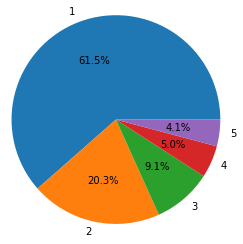

In [ ]:
plt.pie(df_final.play_count.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['1','2','3','4','5'])
plt.show()

*   Showing the total number of interactions per play count which has been set to 5 maximum, the amount of interactions decreases as each number of play counts increases. Just one interaction has the highest number and 5 total interactions has the lowest.
*   In the pie chart with the amount in percentages, 61.5 percent of the interactions occur with just one play count, followed by 20.3 percent with two play counts and only 4.1 percent with 5 play counts. So you're more likely than not going to have just one interaction between a particular user and song.

**Observations and Insights:**

*   Despite a reduced dataset from the revised requirements put in place, there are still plenty of songs that have been played by users or have been seeked out by users to listen to and more than once. Even looking at the top 50 songs there is over 400 interactions per song.
*   The total amount of interactions in the list of users is smaller than the song interactions with the top user haivng 247 interactions. With a million songs in the database this means that a stronger recommendation could be implemented so that more interactions take place.

Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


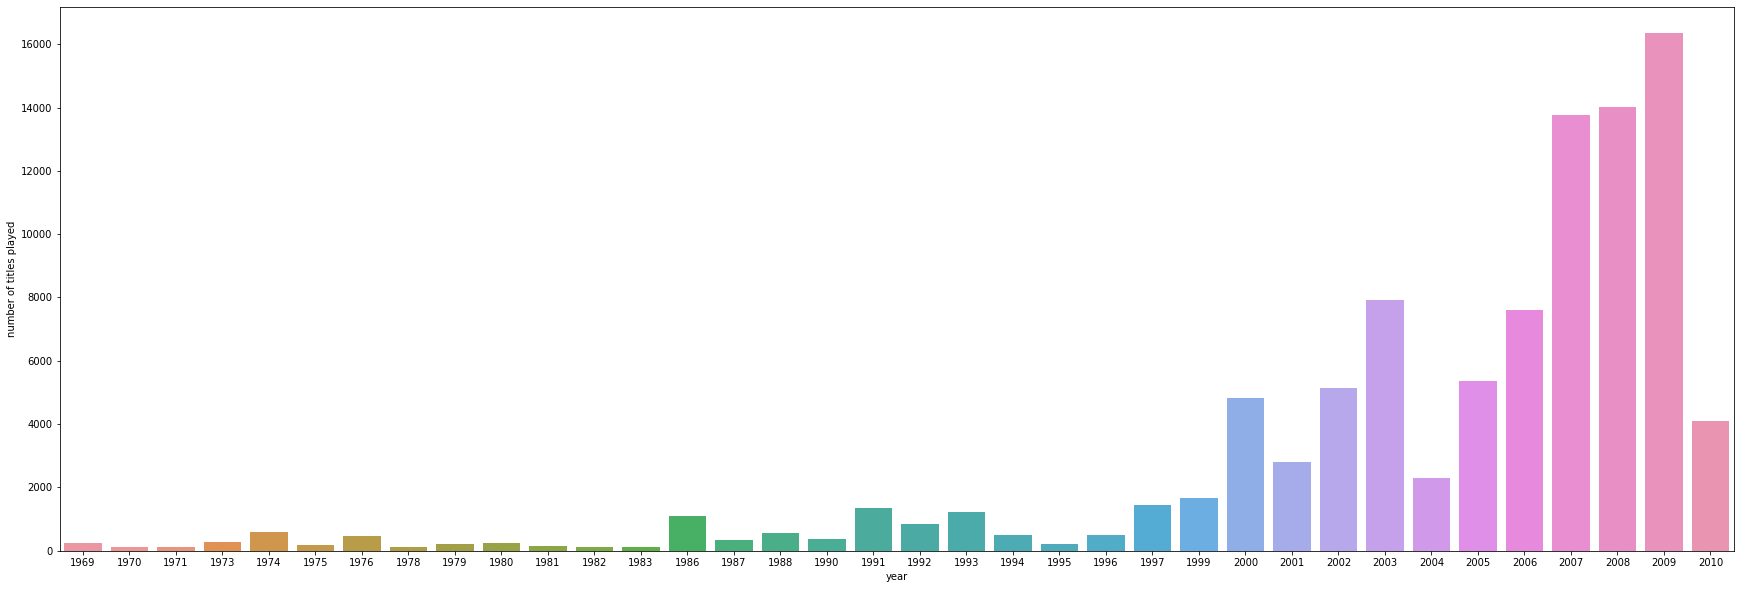

In [ ]:
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

plt.ylabel('number of titles played') 

plt.show()

Songs played by artist

In [ ]:
count_artist_names = df_final.groupby('artist_name').count()['title']

count = pd.DataFrame(count_artist_names)

count.drop(count.index[0], inplace = True)

count.head(10)

,title
artist_name,
A Day To Remember,213
Adam Lambert,540
Aerosmith,403
Alicia Keys,362
Alliance Ethnik,717
Aloe Blacc,117
Amy Winehouse,1268
Angels and Airwaves,301
Arcade Fire,409


Songs played by release

In [ ]:
count_artist_names = df_final.groupby('release').count()['title']

count = pd.DataFrame(count_artist_names)

count.drop(count.index[0], inplace = True)

count.tail(10)

,title
release,
Workout Holiday,108
X & Y,503
Yellow,583
You Know I'm No Good,139
You Know I'm No Good - GFK Version,285
Youth And Young Manhood,132
Yuugata Generation,183
the bird and the bee,405
xx,120


*   Observing the samples for interactions from releases and artists, it is a bit more lopsided from the artist sample than the release sample. I do wonder if multiple playcount numbers from particular songs increaes certain artists interaction totals and that is where the major difference is between artists.

**Observations and Insights:**

*   From the last five years there is a noticable difference in songs that came from those years compared to previous years. This might idenitfy a certain demographic in who is using the database and what songs and artists they are listening to.
*   Looking at the graph it clearly shows that the amount of songs in the database decrease the farther back you go in years. From this century the majority of the songs come from that time frame, while there is some songs from the 1990's but much lower in quantity. It becomes very small in numbers before 1990, so the newer the song the more likely that it is going to be listened to by the user.

**Think About It:** What other insights can be drawn using exploratory data analysis?

*   From the values you can see what users are listening to more than anything which is newer music and that they are not seeking out older music, but it could also depend on the age of the user.
*   If the majority of songs are newer, then building a recommendation system based off that information could make it easier to find the 10 best recommendated songs depending on past interactions.
*   If there are less unique artists then this could also be important to constructing an algorithm where it can locate popular artists but also find lesser known artists that can be recommended to users.

In [ ]:
from google.colab import files
df_final.to_csv('df_final.csv', encoding = 'utf-8-sig') 
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Milestone 2**

*   Now that we have explored the data, let's apply different algorithms to build recommendation systems.
*   Note: Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

**Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from collections import defaultdict

from sklearn.metrics import mean_squared_error

!pip install scipy

from pandas.core.arrays.interval import le
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_final = pd.read_csv('/content/drive/MyDrive/df_final (6).csv')

**Popularity-Based Recommendation Systems¶**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
average_count = df_final.groupby(['song_id']).mean()['play_count']

play_freq = df_final.groupby(['song_id']).count()['play_count']

In [ ]:
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
def top_n_songs(data, n, min_interaction = 100):

  recommendations = data[data['play_freq'] > min_interaction]

  recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)

  return recommendations.index[:n]

In [ ]:
list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

In [ ]:
df_final[df_final['song_id'] == 7224]

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
1850,24098,23297,7224,5,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
2037,28161,76307,7224,1,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
2245,31860,26149,7224,1,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
4362,76415,33280,7224,5,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
4766,81358,42453,7224,1,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
...,...,...,...,...,...,...,...,...
111323,1883439,31269,7224,5,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
112158,1903542,28099,7224,5,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
114439,1948494,36058,7224,1,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006
115786,1968497,27606,7224,5,Victoria (LP Version),Hit By A Train: The Best Of Old 97's,Old 97's,2006


*   Using the top song (7224) based on average play count, this code shows some of its users who interacted with the song.



**User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from surprise import accuracy

from surprise.reader import Reader

from surprise.dataset import Dataset

from surprise.model_selection import GridSearchCV

from surprise.model_selection import train_test_split

from surprise.prediction_algorithms.knns import KNNBasic

from surprise.prediction_algorithms.matrix_factorization import SVD

from surprise.model_selection import KFold

from surprise import CoClustering

**Some useful functions**

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It**: Which metric should be used for this problem to compare different models?

*   When building a recommendation system that will be implementing different models I do think the F1 score should be used because it will show the mean between the precision and recall. While I do believe that the precision and recall metrics are important in the beginning stages, the F1 score will give a better idea of how its performing while comparing models during this assessment.

In [ ]:
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    user_est_true = defaultdict(list)
    
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        user_ratings.sort(key = lambda x : x[0], reverse = True)

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    print('Precision: ', precision)

    print('Recall: ', recall)

    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

*   I think it is fair to have the threshold at 1.5 because it allows the model to be reduced so it can locate the 10 best recommendations for the user. Because it tightens things up a bit I do think it could impact the precision and recall but possibly for the better. If it is lower than around 0.6 or so then it could indicate that the recommendation system is not working properly and the threshold number should be changed. Setting the threshold value of 1.5 is a good spot in that it rests somewhere within the average count values and also looking at the past history regarding the play counts of songs.

In [ ]:
reader = Reader(rating_scale= (0, 5))

data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

trainset, testset = train_test_split(data, test_size=0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

*   I think it would be because a larger portion of your data should be used toward the model and using it for fitting and training. So if there is a higher test size then it is taking away a larger amount of the data that needs to be used for the model training. This in turn could then affect the outputs and results of the data.

In [ ]:
sim_options = {'name': 'msd',
               'user_based': True}

sim_user_user = KNNBasic(sim_options = sim_options, k = 30, random_state = 1, verbose = False)

sim_user_user.fit(trainset)

precision_recall_at_k(sim_user_user)

RMSE: 1.0672
Precision:  0.412
Recall:  0.598
F_1 score:  0.488


**Observations and Insights:**

*   The prescision value looks a little low which at this juncture may indicate that the song recommendations provided are not very relevant.
*   The recall value is right at 0.6 which means that relevant songs are being recommended to the user and that the model has the value at a good spot.
*   The RMSE is still over 1 and that could be improved so the predicted ratings are closer to the actual ratings. The overall F1 score is still lower than it should be so this could also be improved with a better model from the data.

In [ ]:
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.63   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6254190211665536, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
sim_user_user.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.36   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3609600600037504, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights:**

*   Comparing the two samples it looks like the average play count that is predicted for the user with a listened song is considerably higher than the same user that hasn't listened to the particular song. With the actual rating being 2 for the user that has listened to the song, the predicted rating is not too far off but could be improved.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

gs.fit(data)

print(gs.best_score['rmse'])

1.0473120682571855


In [ ]:
print(gs.best_params['rmse'])

{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

sim_user_user_optimized.fit(trainset)

precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**

*   The noticable change from the metrics was the recall that improved after the hyperparameters were fine tuned. While they were all ready at a good level before the model was tuned, it showed the most improvement.
*   The RMSE metric was lowered but not by very much, so it could be a better fit but the fine tuning helped. It should be improved though so the accuracy of the model is better for predictions. The F1 score also improved slightly but mainly from the improvement in the recall value. This is another aspect that could be increased closer to 1 to enhance the accuracy of the model.
*   The one metric that stayed pretty much the same after fine tuning was the precision metric which barely improved, so because of this the F1 score did not change very much.

In [ ]:
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

*   After optimizing and fine tuning the predictions the predicted rating for the user that has listened to a particular song (item 1671) increased substantially and is very close to the actual rating of 2. For the user that hasn't listened to a particular song (item 3232), the predicted values also increased from before the fine tuning but not by much.
*   The k quantities were lower than 30 for both predictions after the optimizing, possibly meaning that there are less observations that are similar to them.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

*   I think using the KNN algorithm could potentially be a solution to finding the 5 closest neighbors to a particular song. This way could calculate the distances among those points to determine what is the nearest 5 neighbors to that song in terms of similarity.

In [ ]:
sim_user_user_optimized.get_neighbors(0, k = 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

**data:** A song dataset

**user_id:** A user-id against which we want the recommendations

**top_n:** The number of songs we want to recommend

**algo:** The algorithm we want to use for predicting the play_count

The output of the function is a set of top_n items recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    recommendations = []
    
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    for item_id in non_interacted_products:
        
        est = algo.predict(user_id, item_id).est
        
        recommendations.append((item_id, est))

    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n]

In [ ]:
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:**

*   The top 5 recommended songs from the new function all have predicted ratings that are well above the threshold of 2 that was used in previous algorithms and models. I believe this is a good sign that this new function is strong with its new predictions and have provided high rated song recommendations to the user.

**Correcting the play_counts and Ranking the above songs**

In [ ]:
def ranking_songs(recommendations, final_rating):
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)
  
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

*   I think the reason behind the quantity being subtracted is that it allows the predicted play counts to have a more realistic and better prediction to the songs. Adding to the quantity might not condense the amount of similar items so that it finds the best recommendations, so perhaps that is the reason that it is better to subtract the quantity.

In [ ]:
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


**Observations and Insights:**

*   The rankings of the predicted ratings and corrected ratings for the top 5 are both parallel in that they are ranked in order for each column. What also is relevant here is that the play frequency is also parallel with the ratings in that they are ranked in order like the other columns. This indicates that there is a correlation between how much a song is played and how high the ratings will be for that song. The impact of the user-item interaction then can't be understated and that the play frequency is important to the ratings and makes it more dependable in its predictions.

**Item Item Similarity-based collaborative filtering recommendation systems**

In [ ]:
sim_options = {'name': 'cosine',
               'user_based': False}

sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

sim_item_item.fit(trainset)

precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**


*   After running the model it looks like the precision metric is quite low which is keeping the F1 score much lower than it should be. This must mean that the recommendations provided for the items are not relevant at this point. The recall is a bit lower than it should be which is around 0.6 so improvement is needed here as well where the relevant items recommended could be fine tuned a bit.
*   The RMSE metric is over 1 which means that this is another area that can be improved since it is still far from being accurate.

In [ ]:
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
sim_item_item.predict(3232, 1671, verbose = True)

user: 3232       item: 1671       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=3232, iid=1671, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**

*   The estimated prediction of 1.36 for the user that has listened to this particular song is much lower than the provided thresold of 2 with the k value being around 20. Maybe this means that with less likely neighbors that this is not a good song to recommend based off the prediction.
*   The estimated prediction of 1.70 with the user that has not listend to the particular song is much higher than the listened to song. It is still below the threshold of 2 which means at this point the metrics for recommendations are still not very strong.

In [ ]:
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

gs.fit(data)

print(gs.best_score['rmse'])

1.024025696240705


In [ ]:
print(gs.best_params['rmse'])

{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters here.

*   The usage of the grid search is vital because it will take the hyperparameters listed in the above model and look at all possibilities within those hyperparameters and models to construct a model that will be most beneficial. Perhaps adjusting the values in the parameter grid could be one way of making the model better depending on how the final output looks after entering the data.

In [ ]:
sim_options = {'name': 'msd',
               'user_based': False}

sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

sim_item_item_optimized.fit(trainset)

precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0423
Precision:  0.34
Recall:  0.563
F_1 score:  0.424


**Observations and Insights:**

*   After optimizing the model it looks as though that the tuned hyperparamters did not change the metrics too much. The RMSE metric even regressed and is slightly farther away from being accurate. The precision metric improved more than the other metrics but it was not a significant increase, so it helped improve the F1 score but only slightly because the recall metric stayed roughly the same.
*   Overall the accuracy of the metrics is still well below par so the fine tuning of the model did not have much of an effect on the metrics. Maybe going back and revising the parameters in the model could help these values improve.

In [ ]:
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.33   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3319659681769878, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.47   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4746440368585654, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

*   After optimizing the model it looks like both predictions for the user went down and were farther away from the threshold of 2. This is on par with the other outputs after fine tuning the hyperparameters in that they had little impact and even showed signs of regression in some areas. The song that was listened to by the user stayed roughly the same with little regression while the song that was not listened to showed a lot more decline in its estimated rating. Both outputs had actual k values of 20 like the previous model before the optimization.

In [ ]:
sim_item_item_optimized.get_neighbors(0, k = 5)

[3, 10, 24, 30, 36]

In [ ]:
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,9942,2.048219
1,2842,1.949116
2,3050,1.885211
3,4939,1.771190
4,1691,1.743513


In [ ]:
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,9942,150,2.048219,1.966570
2,2842,232,1.949116,1.883463
1,3050,233,1.885211,1.819698
4,4939,133,1.771190,1.684479
0,1691,249,1.743513,1.680140


**Observations and Insights:**

*   From the 5 selected neighbors provided the model recommended 5 songs that are all above or at least somewhat close to the threshold of 2. The play frequencies for the songs are all high enough to show that this is a fairly reliable prediction for the 5 songs. The corrected ratings are all pretty close to the predicted ratings, so this shows that this is also a good model for recommending songs if you are looking simply at the closest neighbors to the user.

**Model Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a personalized recommendation system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use latent features to find recommendations for each user.

In [ ]:
svd = SVD(random_state = 1)

svd.fit(trainset)

precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

**Improving matrix factorization based recommendation system by tuning its hyperparameters**

In [ ]:
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

gs.fit(data)

print(gs.best_score['rmse'])

1.0121087151082329


In [ ]:
print(gs.best_params['rmse'])

{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters here.

*   The parameters that they are all set at it looks like it has improved the metrics considerly in most areas. The F1 score has improved but is still below where it should be, while the RMSE metric has been lowered but only slightly. The prediction value for the user that has listened to a particular song is the only noticeable regression. None of the parameters that are being used are near the default options, so perhaps using those values might be a better method to see how the model has affected the outputs.

In [ ]:
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

svd_optimized = svd_optimized.fit(trainset)

precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

*   Using the best possible parameters from the grid search it has shown to have made the metrics better in all four areas. Maybe using the default options would have not made the model better and that this is the best model for future recommendations after through all the possible iterations. It has pushed the F1 score closer to 0.6 which will make this a more reliable model.

In [ ]:
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

In [ ]:
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

**Observations and Insights:**

*   The optimized hyperparameters increased the estimated value by a small amount with using 2 still as a threshold with a particular song that the user has listened to. The song that the user has not listend to has a estimated value that decreased after fine tuning the hyperparameters. I do wonder if this process that uses latent features is affecting the values after tuning the hyperparameters or any regression is more of an aberration.

In [ ]:
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**

*   The tuned hyperparameters have I think changed the model for the better, with the top 5 song recommendations having higher ratings in both columns. They are all a lot closer to the 2 threshold with all the songs ratings being above or just below that threshold value. The difference between the predicted and corrected ratings look about the same after the model was tuned. All the songs have high enough play frequencies that this recommendation model looks stronger.

**Cluster Based Recommendation System**

In clustering-based recommendation systems, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
clust_baseline = CoClustering(random_state = 1)

clust_baseline.fit(trainset)

precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Improving clustering-based recommendation system by tuning its hyper-parameters**

In [ ]:
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

gs.fit(data)

print(gs.best_score['rmse'])

1.061515101753293


In [ ]:
print(gs.best_params['rmse'])

{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters here.

*   I think that having less clusters for the items and users will benefit the recommendation system in that it will make it easier to recommend items and help find users that are similar. Having too many clusters I wonder could make things too complicated for the recommendation system and would require too many iterations of the optimization loop.

In [ ]:
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)

clust_tuned.fit(trainset)

precision_recall_at_k(clust_tuned)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**

*   Condensing the total number of clusters to the default values of 3 after the tuning, the F1 score is below average with the recall being close to average and the precision being relatively low. The RMSE metric is around 1 which is a bit high but isn't too far off from other past models that have been implemented. I wonder if more clusters would help these metrics scores at all.

In [ ]:
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Observations and Insights:**

*   It looks as though the clusters have made the estimated values for both predictions with the user-song interaction a bit below average. The cluster with the user having not listened to the particular song is definitely higher than the song that the user has listened to using the threshold of 2. This seems to be not too much of a surprise with the metrics being below average overall as well. There is definitely some room for improvements regarding the fine tuning of the hyperparameters with the clustering.

**Implementing the recommendation algorithm based on optimized CoClustering model**

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    recommendations = []
    
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    for item_id in non_interacted_products:
        
        est = algo.predict(user_id, item_id).est
        
        recommendations.append((item_id, est))

    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n]

In [ ]:
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

**Correcting the play_count and Ranking the above songs**

In [ ]:
def ranking_songs(recommendations, final_rating):
  
    ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

    ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

    ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

    return ranked_songs

In [ ]:
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,3.094797,2.998124
4,8324,96,2.311498,2.209436
1,9942,150,2.215039,2.133390
0,5531,618,2.124563,2.084337
3,4831,97,2.123783,2.022248


**Observations and Insights:**

*   After going through the extraction and finding the songs that have not been interacted with, it looks like the ratings for these songs are even higher than past models. The clustering method then makes me wonder if this is a better way to help find songs for users in the recommendation system stemming from the results. The top 5 recommended songs also have high play frequencies, so I feel more comfortable using this model then the other models used as of right now.

**Content Based Recommendation Systems**

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

*   I do think that other aspects of these songs can be used toward building a stronger recommendation system. If we know the genre of music or even the year of the album release then I think that can help identify user interests and that in turn can find similar users which can help recommend songs that the user would more likely listen to. The only part of this that could possibly hinder the best recommendation system regarding song information would be if any of those features are missing.

In [ ]:
df_small = df_final

In [ ]:
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year,text
0,200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
1,202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
2,203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
3,204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
4,205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

df_small = df_small.drop_duplicates(subset = ['title'])

df_small = df_small.set_index('title')

df_small.head(5)

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
df_small.shape

(561, 4)

In [ ]:
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
import nltk

nltk.download("punkt")

nltk.download("stopwords")
 
nltk.download("wordnet")

import re

from nltk import word_tokenize

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk

nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**We will create a function to pre-process the text data:**

In [ ]:
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words("english")] 
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
tfidf = TfidfVectorizer(tokenizer = tokenize)

song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    idx = indices[indices == title].index[0]

    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn To Fly

In [ ]:
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [ ]:
df_final.query("release == 'There Is Nothing Left To Lose'")

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year,text
676,8275,75901,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
1369,19706,9097,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
1535,20895,19193,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
2171,31768,26149,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
3315,54773,35737,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
...,...,...,...,...,...,...,...,...,...
115373,1964010,35114,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
115586,1966225,21484,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
116883,1988416,74529,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
117299,1991996,14416,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...


In [ ]:
df_final.query("artist_name == 'Foo Fighters'")

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year,text
259,1272,49549,6525,2,The Pretender,Echoes_ Silence_ Patience & Grace,Foo Fighters,2007,The Pretender Echoes_ Silence_ Patience & Grac...
517,4486,7320,6525,1,The Pretender,Echoes_ Silence_ Patience & Grace,Foo Fighters,2007,The Pretender Echoes_ Silence_ Patience & Grac...
676,8275,75901,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
760,8780,57932,6525,2,The Pretender,Echoes_ Silence_ Patience & Grace,Foo Fighters,2007,The Pretender Echoes_ Silence_ Patience & Grac...
1369,19706,9097,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
...,...,...,...,...,...,...,...,...,...
117299,1991996,14416,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
117348,1992111,14416,6525,1,The Pretender,Echoes_ Silence_ Patience & Grace,Foo Fighters,2007,The Pretender Echoes_ Silence_ Patience & Grac...
117375,1992181,14416,9249,1,Everlong,The Colour And The Shape (Special Edition),Foo Fighters,1992,Everlong The Colour And The Shape (Special Edi...
117546,1995070,9570,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...


*   The final two queries shows what users were listening to the song 'Learn To Fly' from the artist'Foo Fighters' on their release 'There Is Nothing Left To Lose'. From both queries there are several instances where there were multiple playcounts for the song 'Learn To Fly' and 'The Pretender' which was one of the top recommended songs, so this could be an indicator that the recommendation system built here is working.

**Observations and Insights:**

*   It looks like there is some similarities in that the first two songs in the recommendation list are songs from the same band and one song has the word 'fly' in it like the song we are looking up recommendations for based off the similarities. That is a pretty solid indication that the text features extraction worked to find similar songs. There are plenty songs in the database that have similar qualities it looks like so this would make for a more in-depth recommendation system for finding similar songs for a user.